# Ejercicio 2. 
## Trabajos de preprocesado y adecuación de un DataSet, con el objetivo de prepararlo y trabajarlo como un DataFrame para extraer información.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
películas=pd.read_csv('movies.dat',
                   sep = "::",
                   names=['id', 'Título', 'Género'],
                   index_col='id', engine = 'python',
                   encoding = "ISO-8859-1"
                  )
películas

,Título,Género
id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


In [15]:
películas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Título  3883 non-null   object
 1   Género  3883 non-null   object
dtypes: object(2)
memory usage: 91.0+ KB


In [16]:
películas.isnull().sum()

Título    0
Género    0
dtype: int64

No hay valores nulos, por lo que no habrá problema alguno en la manipulación del DataSet. Además, todos los datos son valores tipo objeto, algo que ya se conocía con un simple vistazo a los tipos de datos que refleja la tabla.

## Separación del título y año de cada película

In [17]:
# Extracción del año de la columna "Título" y su adición en una nueva denominada "Año".
películas['Año']=películas.Título.str.extract('\((\d{4})\)')
películas.head()

,Título,Género,Año
id,,,
1,Toy Story (1995),Animation|Children's|Comedy,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [33]:
# Supresión del año en la columna Título
películas['Título'] = películas.Título.str.replace('\s+\(\d{4}\)','', regex=True)
películas.head(10)

,Título,Género,Año
id,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
6,Heat,Action,1995
7,Sabrina,Comedy,1995
8,Tom and Huck,Adventure,1995
9,Sudden Death,Action,1995


In [38]:
películas.Año.sort_values()

id
3132    1919
2823    1919
2821    1919
3309    1920
3231    1920
        ... 
3827    2000
3535    2000
3829    2000
3831    2000
3952    2000
Name: Año, Length: 3883, dtype: object

## Conservar solo un género por película

In [26]:
# División de cada cadena de la columna 'Género' en una lista de subcadenas cuando encuentre el símbolo '|', para luego quedarse
# únicamente con el primer elemento o subcadena.

películas['Género'] = películas.Género.str.split('|').str[0].str.strip()
películas.head(10)

,Título,Género,Año
id,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
6,Heat,Action,1995
7,Sabrina,Comedy,1995
8,Tom and Huck,Adventure,1995
9,Sudden Death,Action,1995


In [20]:
# Se confirman los cambios tanto visualmente por el dataframe como por la obtención nuevamente de valores únicos.
películas.Género.unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

## Ahora ya se dispone de un dataframe totalmente preparado para la extracción de información.

In [42]:
películas

,Título,Género,Año
id,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000


In [43]:
películas.nunique()

Título    3841
Género      18
Año         81
dtype: int64

# Ejercicio 3. Mostrar información relevante con una representación gráfica explicada.

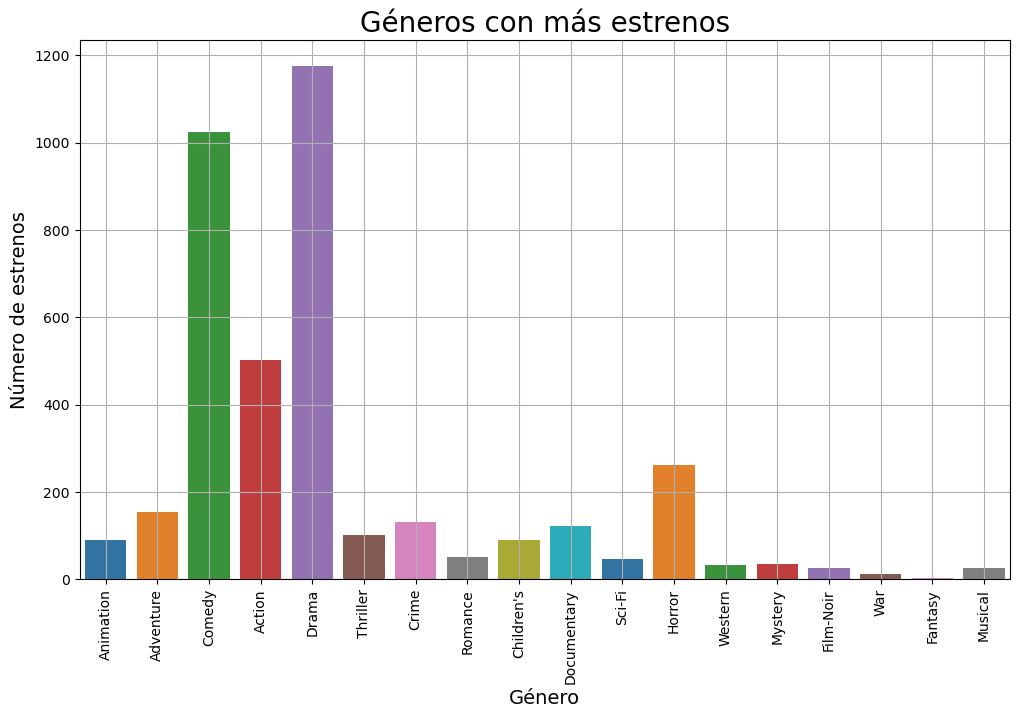

In [44]:
plt.figure(figsize=(12,7))
sns.countplot(data=películas, x='Género', palette='tab10');
plt.grid()
plt.xticks(rotation=90)
plt.title('Géneros con más estrenos', fontsize=20)
plt.ylabel('Número de estrenos', fontsize= 14)
plt.xlabel('Género', fontsize= 14)



plt.show()


El género de Drama es el que ha tenido más estrenos con unas 1180 películas desde que tiene registros el dataframe (a partir del año 1919 y hasta el 2000), seguido de Comedy con alrededor de 1015 registros. Por el contrario, el género de Fantasy es el que menos estrenos registra, cantidad que no llega siquiera a la decena. Realmente, casi todos los géneros se encuentran en un rango inferior a 200 estrenos, a excpeción de Action y Horror, además de los dos primeros mencionados al inicio.